<a href="https://colab.research.google.com/github/michelucci/zhaw-dlcourse-spring2019/blob/master/Week%204%20-%20One%20Neuron/Week%204%20-%20Activation%20functions%20and%20gradient%20descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Networks and Deep Learning for Life Sciences and Health Applications - An introductory course about theoretical fundamentals, case studies and implementations in python and tensorflow

(C) Umberto Michelucci 2018 - umberto.michelucci@gmail.com 

github repository: https://github.com/michelucci/zhaw-dlcourse-spring2019

Spring Semester 2019

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib as mpl

## Function for plots

We will use the following function to perform some plotting, so you can safely ignore it for now. But the following cell should be run before the rest of the code.

In [ ]:
def myplot(x,y, name, xlab, ylab):
    plt.rc('font', family='arial')
    plt.rc('xtick', labelsize='x-small')
    plt.rc('ytick', labelsize='x-small')
    
    plt.tight_layout()

    fig = plt.figure(figsize=(8, 5))
    ax = fig.add_subplot(1, 1, 1)
    
    plt.tick_params(labelsize=16)

    ax.plot(x, y, ls='solid', color = 'black')
    ax.set_xlabel(xlab, fontsize = 16)
    ax.set_ylabel(ylab, fontsize = 16)

## Activation functions plots

### Creation of arrays of activation functions

First let's create the data that we need to plot the different activation functions

In [ ]:
x = np.arange(-5,5,0.1)
identity = x
sigmoid = 1.0 / (1.0 + np.exp(-x))
arctan = np.tanh(x)
relu = np.maximum(x, 0)
leakyrelu = relu - 0.05 * np.maximum(-x, 0)

## Identity

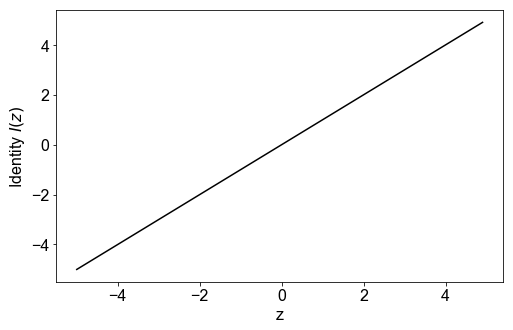

In [ ]:
myplot(x, identity, 'Figure_1-4', 'z', 'Identity $I(z)$')

## Sigmoid activation function

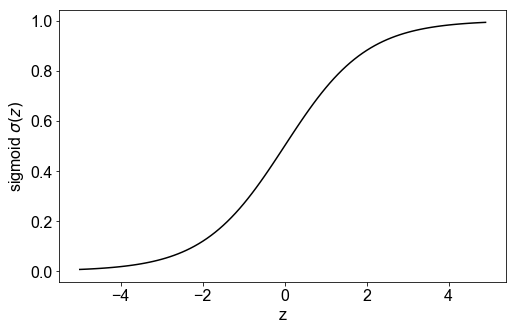

In [ ]:
myplot(x, sigmoid, 'Figure_1-5', 'z', 'sigmoid $\sigma(z)$')

## tanh activation function

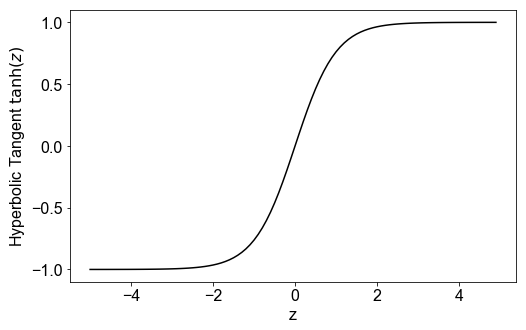

In [ ]:
myplot(x, arctan, 'Figure_1-6', 'z', r'Hyperbolic Tangent $\tanh(z)$')

## ReLU activation function

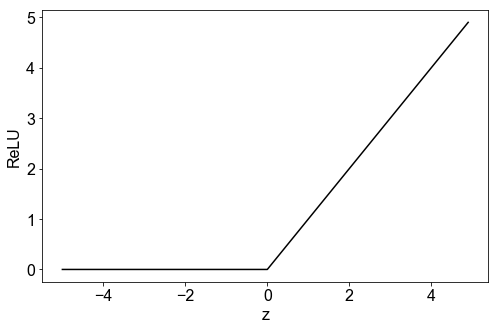

In [ ]:
myplot(x, relu, 'Figure_1-7', 'z', 'ReLU')

## Leaky ReLU Activation function

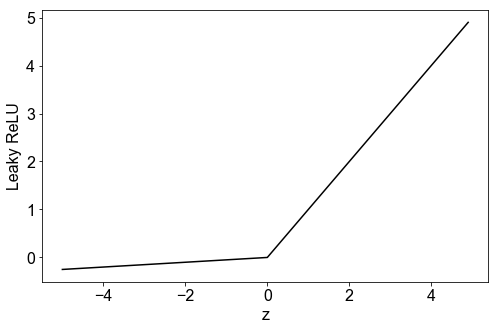

In [ ]:
myplot(x, leakyrelu, 'Figure_1-8', 'z', 'Leaky ReLU')

# SWISH activation function

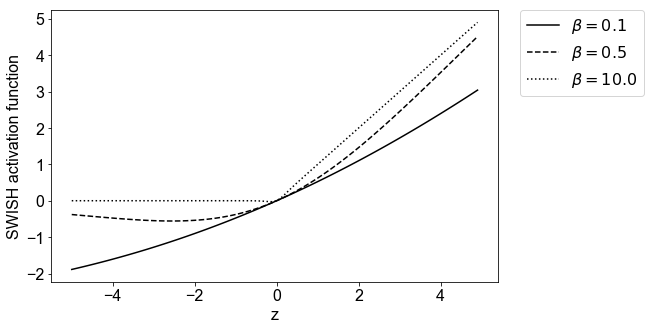

In [ ]:
swish1 = x / (1.0 + np.exp(-0.1*x))
swish2 = x / (1.0 + np.exp(-0.5*x))
swish3 = x / (1.0 + np.exp(-10.0*x))

plt.rc('font', family='arial')
    #plt.rc('font',**{'family':'serif','serif':['Palatino']}) 
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
    
plt.tight_layout()

fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1)
plt.tick_params(labelsize=16)
ax.plot(x, swish1, ls='solid', color = 'black', label=r'$\beta=0.1$')
ax.plot(x, swish2, ls='dashed', color = 'black', label=r'$\beta=0.5$')
ax.plot(x, swish3, ls='dotted', color = 'black', label=r'$\beta=10.0$')
ax.set_xlabel('z', fontsize = 16)
ax.set_ylabel('SWISH activation function', fontsize = 16)
#plt.xlim(0,8)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 16)

# Activation function documentation

You can find the TensorFlow documentation on the activation function at this URL

https://www.tensorflow.org/api_docs/python/tf/keras/activations

From there you need to go into the code to check how it is implemented.

# Difference in Speed between numpy and classical Python

## Difference between lists and numpy arrays

In [2]:
lst1 = random.sample(range(1, 10**8), 10**7)
lst2 = random.sample(range(1, 10**8), 10**7)

random.sample takes a population and a sample size k and returns k random members of the population.

## With zip

In [3]:
%%timeit
out1 = [a*b for a,b in zip(lst1,lst2)]

977 ms ± 20.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## with enumerate

In [4]:
%%timeit
ab = [val * lst2[i] for i, val in enumerate(lst1)]

1.34 s ± 1.83 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Standard loop

In [5]:
%%timeit
ab = [lst1[i]*lst2[i] for i in range(len(lst1))]

1.62 s ± 5.58 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## with numpy

In [10]:
%%timeit
list1_np = np.array(lst1)
list2_np = np.array(lst2)

1.61 s ± 33.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [7]:
%%timeit
out2 = np.multiply(list1_np, list2_np)

18 ms ± 1.27 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [9]:
%%timeit
out2 = np.multiply(lst1, lst2)

1.65 s ± 34.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
